The pi estimate for 10000 counts is: 3.1712


Text(0.5, 1.0, 'Pi Calculation')

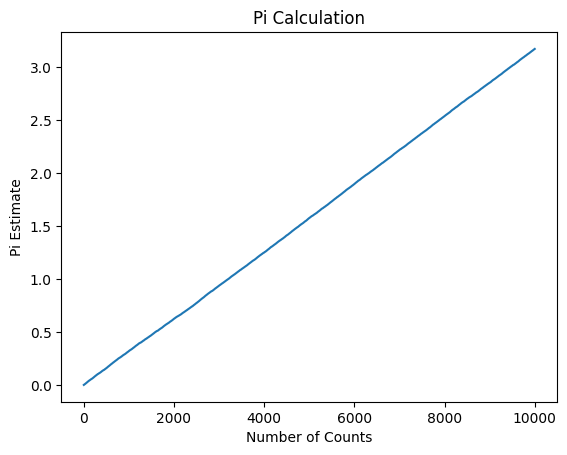

In [47]:
#original attempt

import random #imports random library
import math #imports math
import matplotlib.pyplot as plt

total_counts = 10000 #total number of points

x_array = [] #begins x and y arrays for plot
y_array = []

def pi_estimate(): #initializes function
    num_counts = 0 #initial value of 0
    num_inside_circle = 0 #inital value of 0
    for i in range(total_counts): #initializes for loop
        x = random.random() #generates random (x, y) point
        y = random.random()
        num_counts += 1 #adds 1 to num_counts value
        x_array.append(num_counts) #adds current num_counts to x array
        distance = math.sqrt(x**2 + y**2) #calculates distance 
        if distance < 1: #sets condition
            num_inside_circle += 1 #adds 1 to counts within the circle
        pi = 4 * (num_inside_circle / total_counts) #calculates pi at i value
        y_array.append(pi) #adds current pi value to y array
    return pi #returns the final value of pi

print("The pi estimate for 10000 counts is:", pi_estimate())

plt.plot(x_array, y_array) #sets up plot
plt.xlabel("Number of Counts")
plt.ylabel("Pi Estimate")
plt.title("Pi Calculation")

I think that my estimater was fairly effective at calculating a value of pi, given a specified number of counts, as, once past around 1500, the estimate is within .01 from the actual value of pi. However, when trying to be more accurate by using higher and higher numbers of counts, the code takes longer to run, therefore showing that it could be made more effective.

[20, 40, 80, 160, 320, 640, 1280]
[3.2, 3.4, 3.25, 3.075, 3.2125, 3.10625, 3.1375]
The final approximation for pi is: 3.1375


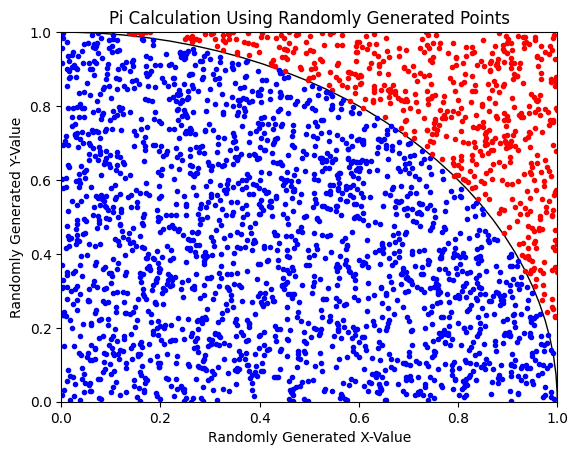

In [90]:
#improved code

import random #imports necessary libraries
import matplotlib.pyplot as plt
import numpy as np

circle = plt.Circle((0, 0), 1, fill=False) #creates circle
fig, ax = plt.subplots()
ax.add_patch(circle) #plots circle

x_array = [] #creates blank x and y arrays
y_array = []

def calculate_pi(counts): #initiates function
    num_in_circle = 0 #starts number of in/out of circle at zero
    num_out_circle = 0
    for i in range(counts): #starts for loop
        x = random.random() #generates random number between zero and one
        y = random.random()
        distance = np.sqrt(x**2 + y**2) #pythagoreon theorem
        if distance < 1: #condition to be in circle
            num_in_circle += 1 #adds one count to num_in_circle
            plt.plot(x, y, '.b') #plots points inside circle as blue dot
        else: #everything else
            num_out_circle += 1 #adds one count to num_out_circle
            plt.plot(x, y, '.r') #plots points outside circle as red dot
    pi = 4 * (num_in_circle / counts) #calculates pi
    x_array.append(counts) #adds counts to x array
    y_array.append(pi) #adds pi value to y array
    return pi

plt.ylim((0, 1)) #sets limits on plot axes
plt.xlim((0, 1))

calculate_pi(20) #calculates pi at logarithmic intervals of *2, starting at 20
calculate_pi(40)
calculate_pi(80)
calculate_pi(160)
calculate_pi(320)
calculate_pi(640)
calculate_pi(1280)

print(x_array) #prints values for arrays to double check if they calculated right
print(y_array)

plt.title("Pi Calculation Using Randomly Generated Points") #labels for graph
plt.ylabel("Randomly Generated Y-Value")
plt.xlabel("Randomly Generated X-Value")

print("The final approximation for pi is:", y_array[6]) #prints final pi approximation

Text(0.5, 1.0, 'Pi Calculation Using Randomly Generated Points')

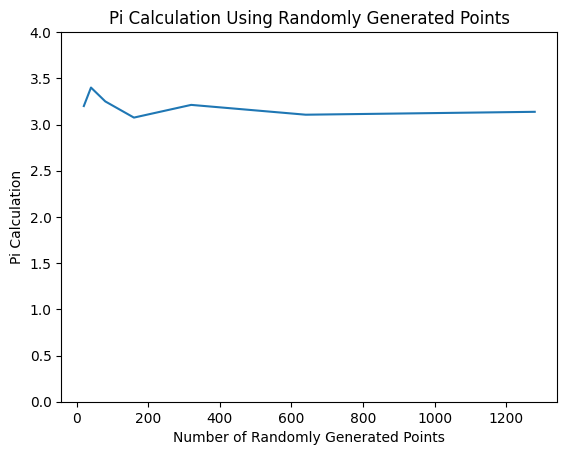

In [91]:
plt.plot(x_array, y_array) #plots x_array vs y_array
plt.ylim(0, 4) #sets limits on y axis

plt.xlabel("Number of Randomly Generated Points") #labels plot
plt.ylabel("Pi Calculation")
plt.title("Pi Calculation Using Randomly Generated Points")

Compared to my previous attempt to calculate pi using randomly generated points, this code was much improved and showed in a much clearer way how the pi approximation was created. In order to break down the project into more steps, I started with plotting the points against a circle to qualitatively show the number of randomly generated points within the circle vs outside of the circle. I also used a logarithmic scale in the number of randomly generated points so as to better show the relationship between mumber of points and pi approximation, and that helps the graph showing the relationship beteen number of points and pi approximation be more clear. 

In [92]:
#finding quantitative way to evaluate how good approximation using regression techniques

y_difference = y_array

for i in range(len(y_difference)): #begins for loop
    y_difference[i] -= np.pi #subtracts pi from each value in y_difference

print(y_difference) #prints y_difference

[0.05840734641020706, 0.2584073464102068, 0.10840734641020688, -0.06659265358979294, 0.0709073464102068, -0.03534265358979294, -0.004092653589792938]


Text(0, 0.5, 'Difference Between Calculated Pi and Real Pi Value')

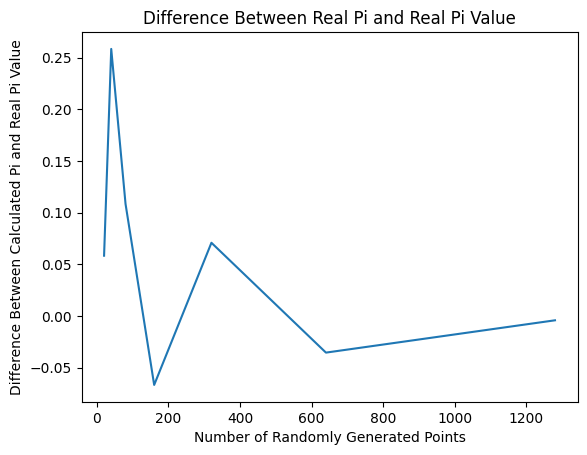

In [93]:
plt.plot(x_array, y_difference) #plots regression function
plt.title("Difference Between Real Pi and Real Pi Value") #labels plot
plt.xlabel("Number of Randomly Generated Points")
plt.ylabel("Difference Between Calculated Pi and Real Pi Value")